In [14]:
import torch
from torch import nn
from torch import optim
import numpy as np
import matplotlib.pyplot as plt

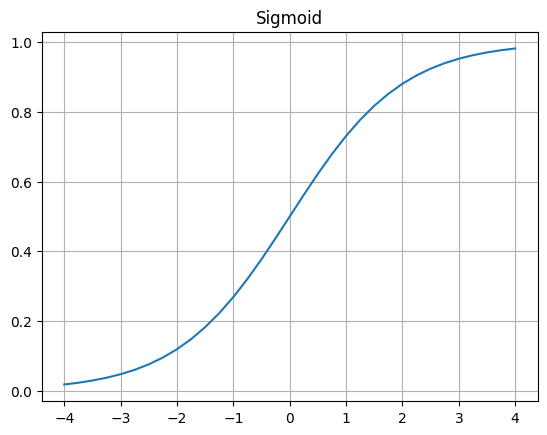

In [2]:
x_np = np.arange(-4, 4.1, 0.25)
x = torch.tensor(x_np).float()
y = torch.sigmoid(x)

plt.title("Sigmoid")
plt.plot(x.data, y.data)
plt.grid()
plt.show()

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()
x_org, y_org = iris.data, iris.target

print('원본 데이터', x_org.shape, y_org.shape)

원본 데이터 (150, 4) (150,)


In [4]:
x_data = iris.data[:100, :2]
y_data = iris.target[:100]

print('대상 데이터', x_data.shape, y_data.shape)

대상 데이터 (100, 2) (100,)


In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=70, test_size=30, random_state=123)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(70, 2) (30, 2) (70,) (30,)


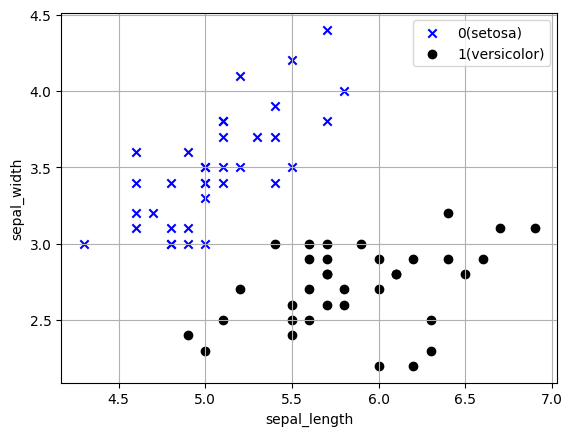

In [6]:
x_t0 = x_train[y_train == 0]
x_t1 = x_train[y_train == 1]

plt.scatter(x_t0[:, 0], x_t0[:, 1], marker='x', c='b', label='0(setosa)')
plt.scatter(x_t1[:, 0], x_t1[:, 1], marker='o', c='k', label='1(versicolor)')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()
plt.grid()
plt.show()

In [7]:
n_input = x_train.shape[1]
n_output = 1
print(f'n_input: {n_input} n_output: {n_output}')

n_input: 2 n_output: 1


In [10]:
class Net(nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()
        self.l1 = nn.Linear(n_input, n_output)
        self.sigmoid = nn.Sigmoid()

        self.l1.weight.data.fill_(1.0)
        self.l1.bias.data.fill_(1.0)

    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.sigmoid(x1)
        return x2

In [12]:
net = Net(n_input, n_output)
print(net)

Net(
  (l1): Linear(in_features=2, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [13]:
from torchinfo import summary
summary(net, (2,))

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [1]                       --
├─Linear: 1-1                            [1]                       3
├─Sigmoid: 1-2                           [1]                       --
Total params: 3
Trainable params: 3
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [15]:
criterion = nn.BCELoss()
lr = 0.01
optimizer = optim.SGD(net.parameters(), lr=lr)

In [16]:
inputs = torch.tensor(x_train).float()
labels = torch.tensor(y_train).float()
labels1 = labels.view((-1, 1))

inputs_test = torch.tensor(x_test).float()
labels_test = torch.tensor(y_test).float()
labels1_test = labels_test.view((-1, 1))

In [20]:
print(f"📌 모델이 위치한 장치: {next(net.parameters()).device}")
print(f"📥 inputs의 장치: {inputs.device}")
# print(f"📤 outputs의 장치: {outputs.device}")

📌 모델이 위치한 장치: cpu
📥 inputs의 장치: cpu


In [19]:
net = net.to('cpu')

In [21]:
outputs = net(inputs)
loss = criterion(outputs, labels1)

In [24]:
lr = 0.01
net = Net(n_input, n_output)
criterion = nn.BCELoss()
optimizer = optim.SGD(net.parameters(), lr=lr)
num_epochs = 10000
history = np.zeros((0, 5))

In [25]:
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels1)
    loss.backward()
    optimizer.step()

    train_loss = loss.item()
    predicted = torch.where(outputs < 0.5, 0, 1)
    train_acc = (predicted == labels1).sum() / len(y_train)

    outputs_test = net(inputs_test)
    loss_test = criterion(outputs_test, labels1_test)
    
    val_loss = loss_test.item()
    predicted_test = torch.where(outputs_test < 0.5, 0, 1)
    val_acc = (predicted_test == labels1_test).sum() / len(y_test)

    if (epoch % 10 == 0):
        print(f'Epoch [{epoch}/{num_epochs}], loss: {train_loss:.5f} acc: {train_acc:.5f} val_loss: {val_loss:.5f} val_acc: {val_acc:.5f}')
        item = np.array([epoch, train_loss, train_acc, val_loss, val_acc])
        history = np.vstack((history, item))

Epoch [0/10000], loss: 4.77289 acc: 0.50000 val_loss: 4.49384 val_acc: 0.50000
Epoch [10/10000], loss: 3.80546 acc: 0.50000 val_loss: 3.56537 val_acc: 0.50000
Epoch [20/10000], loss: 2.84328 acc: 0.50000 val_loss: 2.64328 val_acc: 0.50000
Epoch [30/10000], loss: 1.91613 acc: 0.50000 val_loss: 1.76244 val_acc: 0.50000
Epoch [40/10000], loss: 1.17137 acc: 0.50000 val_loss: 1.08537 val_acc: 0.50000
Epoch [50/10000], loss: 0.84140 acc: 0.50000 val_loss: 0.81872 val_acc: 0.50000
Epoch [60/10000], loss: 0.77087 acc: 0.50000 val_loss: 0.77093 val_acc: 0.50000
Epoch [70/10000], loss: 0.75450 acc: 0.34286 val_loss: 0.76105 val_acc: 0.33333
Epoch [80/10000], loss: 0.74542 acc: 0.25714 val_loss: 0.75447 val_acc: 0.20000
Epoch [90/10000], loss: 0.73734 acc: 0.24286 val_loss: 0.74778 val_acc: 0.16667
Epoch [100/10000], loss: 0.72949 acc: 0.24286 val_loss: 0.74098 val_acc: 0.13333
Epoch [110/10000], loss: 0.72180 acc: 0.27143 val_loss: 0.73419 val_acc: 0.16667
Epoch [120/10000], loss: 0.71423 acc: 0

In [26]:
print(f"초기상태: 손실: {history[0, 3]:.5f} 정확도: {history[0, 4]:.5f}")
print(f"최종상태: 손실: {history[-1, 3]:.5f} 정확도: {history[-1, 4]:.5f}")

초기상태: 손실: 4.49384 정확도: 0.50000
최종상태: 손실: 0.15395 정확도: 0.96667


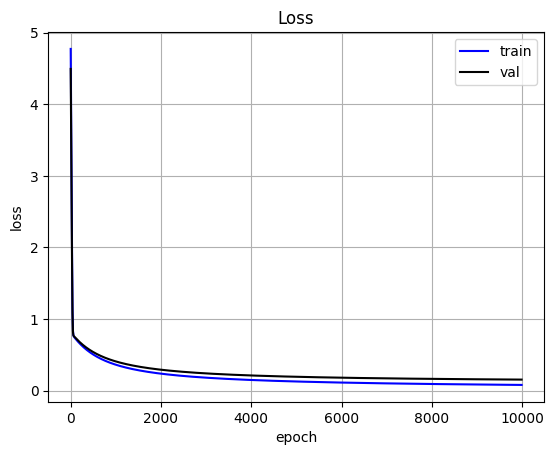

In [27]:
plt.plot(history[:, 0], history[:, 1], 'b', label='train')
plt.plot(history[:, 0], history[:, 3], 'k', label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss')
plt.legend()
plt.grid()
plt.show()

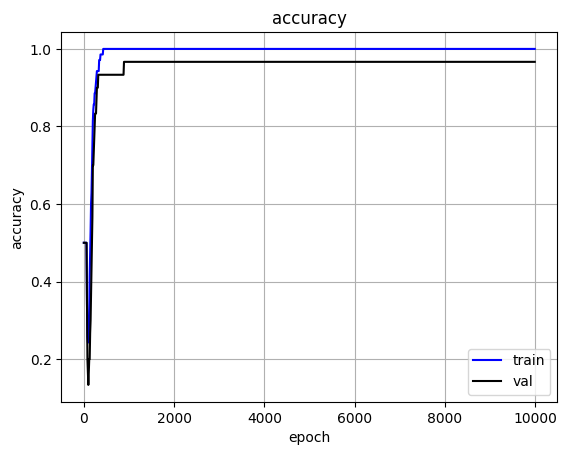

In [28]:
plt.plot(history[:, 0], history[:, 2], 'b', label='train')
plt.plot(history[:, 0], history[:, 4], 'k', label='val')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('accuracy')
plt.legend()
plt.grid()
plt.show()

In [30]:
# 파라미터 취득
bias = net.l1.bias.data.numpy()
weight = net.l1.weight.data.numpy()
print(f'BIAS = {bias}, WEIGHT = {weight}')

# 결정 경계를 그리기 위해 x1로부터 x2를 계산
def decision(x):
    return(-(bias + weight[0,0] * x)/ weight[0,1])

# 산포도의 x1의 최솟값과 최댓값
xl = np.array([x_test[:,0].min(), x_test[:,0].max()])
yl = decision(xl)

# 결과 확인
print(f'xl = {xl}  yl = {yl}')

BIAS = [0.33861262], WEIGHT = [[ 2.9700322 -5.300015 ]]
xl = [4.4 7. ]  yl = [2.52956915 3.98656197]


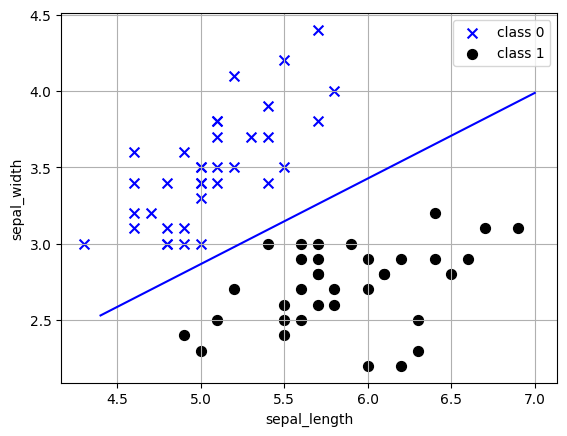

In [32]:
plt.scatter(x_t0[:, 0], x_t0[:, 1], marker='x', c='b', s=50, label='class 0')
plt.scatter(x_t1[:, 0], x_t1[:, 1], marker='o', c='k', s=50, label='class 1')
plt.plot(xl, yl, c='b')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()
plt.grid()
plt.show()